<a href="https://colab.research.google.com/github/Shanmukha2001/NLP/blob/main/TextOperations/TextProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
import nltk
import pandas as pd
import numpy as np
import spacy
from sklearn.tree import DecisionTreeClassifier
#import CountVectorizer, RandomForest, pipeline, classification_report from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

nlp = spacy.load("en_core_web_sm")

# Part of speech

Exercise for Spacy POS tutorial,

You are parsing a news story from cnbc.com. News story is stores in news_story.txt which is available in this same folder on github. You need to,
Extract all NOUN tokens from this story. You will have to read the file in python first to collect all the text and then extract NOUNs in a python list
Extract all numbers (NUM POS type) in a python list
Print a count of all POS tags in this story

In [ ]:
with open('/content/news_story.txt', 'r') as f:
    text = f.read()

nouns = []
nums = []
doc = nlp(text)
for token in doc:
  if token.pos_ == "NOUN":
    nouns.append(token)
  elif token.pos_ == "NUM":
    nums.append(token)
len(nouns),len(nums)

(96, 19)

Print a count of all POS tags

In [ ]:
count = doc.count_by(spacy.attrs.POS)
count

{92: 96,
 100: 27,
 86: 15,
 85: 39,
 96: 16,
 97: 32,
 90: 34,
 95: 4,
 87: 13,
 89: 10,
 84: 23,
 103: 7,
 93: 19,
 94: 4,
 98: 8,
 101: 1}

In [ ]:
for k,v in count.items():
  print(doc.vocab[k].text,v,sep="|")

NOUN|96
VERB|27
ADV|15
ADP|39
PROPN|16
PUNCT|32
DET|34
PRON|4
AUX|13
CCONJ|10
ADJ|23
SPACE|7
NUM|19
PART|4
SCONJ|8
X|1


# Named Entity Recognition

Excersie: 1
Extract all the Geographical (cities, Countries, states) names from a given text

Expected Output:

Geographical location Names: [India, Delhi, Gujarat, Tamilnadu, Andhrapradesh, Assam, Bihar]

In [ ]:
text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

doc = nlp(text)

In [ ]:
l = []
for ent in doc.ents:
  if ent.label_ == "GPE":
    l.append(ent)
l,len(l)

([India, Delhi, Gujarat, Tamilnadu, Pongal, Andhrapradesh, Assam, Bihar], 8)


Excersie: 2
Extract all the birth dates of cricketers in the given Text

In [ ]:
text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19 December 1974."""

doc = nlp(text)

In [ ]:
li = []
for e in doc.ents:
  if e.label_ == "DATE":
    li.append(e)
li,len(li)

([24 April 1973, 5 November 1988, 7 July 1981, 19 December 1974], 4)

# Kaggle Import

In [ ]:
# prompt: provide a function which returns dataset from the kaggle url usiung kaggle.json from kaggle folder in drive

import os
import kaggle
def get_kaggle_dataset(dataset_name):
  if not os.path.isfile(os.path.expanduser('/content/drive/MyDrive/kaggle/kaggle.json')):
    print("Upload kaggle.json here")
    files.upload()

  if not os.path.isfile('IMDB Dataset.csv'):
    !mkdir ~/.kaggle
    !mv ./kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

    df = 'dataset_name'
    zip_name = df.split('/')[-1]

    !kaggle datasets download -d {df}
    !unzip -q ./{zip_name}.zip -d .
  df = pd.read_csv('IMDB Dataset.csv')
  return df


# Bag of words

In [ ]:
df = get_kaggle_dataset('lakshmi25npathi/imdb-dataset-of-50k-movie-reviews')

In [ ]:
df['Category'] = df.sentiment.map({'positive':0,'negative':1})

In [ ]:
df.shape,df.head(5)

((50000, 3),
                                               review sentiment  Category
 0  One of the other reviewers has mentioned that ...  positive         0
 1  A wonderful little production. <br /><br />The...  positive         0
 2  I thought this was a wonderful way to spend ti...  positive         0
 3  Basically there's a family where a little boy ...  negative         1
 4  Petter Mattei's "Love in the Time of Money" is...  positive         0)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.review,df.Category,test_size=0.2,random_state=2022,shuffle=True)

Exercise 1

In [ ]:
vectorizer = CountVectorizer()
clf = Pipeline([
    ('vectorizer',vectorizer),
    ('classifier',RandomForestClassifier(max_depth=50, random_state=0))
])

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4957
           1       0.87      0.84      0.85      5043

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Stop words

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = '''
Thor: Love and Thunder is a 2022 American superhero film based on Marvel Comics featuring the character Thor, produced by Marvel Studios and
distributed by Walt Disney Studios Motion Pictures. It is the sequel to Thor: Ragnarok (2017) and the 29th film in the Marvel Cinematic Universe (MCU).
The film is directed by Taika Waititi, who co-wrote the script with Jennifer Kaytin Robinson, and stars Chris Hemsworth as Thor alongside Christian Bale, Tessa Thompson,
Jaimie Alexander, Waititi, Russell Crowe, and Natalie Portman. In the film, Thor attempts to find inner peace, but must return to action and recruit Valkyrie (Thompson),
Korg (Waititi), and Jane Foster (Portman)—who is now the Mighty Thor—to stop Gorr the God Butcher (Bale) from eliminating all gods.
'''

#step1: Create the object 'doc' for the given text using nlp()
doc = nlp(text)

#step2: define the variables to keep track of stopwords count and total words count
total_words_count =0
stop_words_count =0
for token in doc:
  if token.is_stop:
    stop_words_count += 1
  total_words_count +=  1

#step3: iterate through all the words in the document

#step4: print the count of stop words
print(stop_words_count)


#step5: print the percentage of stop words compared to total words in the text
print(stop_words_count/total_words_count)

40
0.25


In [ ]:
#use this pre-processing function to pass the text and to remove all the stop words and finally get the cleaned form
def preprocess(text):
    doc = nlp(text)
    no_stop_words = [token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)


#Step1: remove the stopword 'not' in spacy
nlp.vocab['not'].is_stop = False

#step2: send the two texts given above into the pre-process function and store the transformed texts
doc = preprocess("good text")
doc1 = preprocess("not good text")

#step3: finally print those 2 transformed texts
doc,doc1

('good text', 'not good text')

In [ ]:
text = ''' The India men's national cricket team, also known as Team India or the Men in Blue, represents India in men's international cricket.
It is governed by the Board of Control for Cricket in India (BCCI), and is a Full Member of the International Cricket Council (ICC) with Test,
One Day International (ODI) and Twenty20 International (T20I) status. Cricket was introduced to India by British sailors in the 18th century, and the
first cricket club was established in 1792. India's national cricket team played its first Test match on 25 June 1932 at Lord's, becoming the sixth team to be
granted test cricket status.
'''


#step1: Create the object 'doc' for the given text using nlp()
doc = nlp(text)


#step2: remove all the stop words and punctuations and store all the remaining tokens in a new list
msg = []
for i in doc:
  if not i.is_stop | i.is_punct:
    msg.append(i.text)
m = ' '.join(msg)
# print(m)

#step3: create a new dictionary and get the frequency of words by iterating through the list which contains stored tokens
dic = {}
for i in msg:
  if i!='\n' and i !=' ':
    if i in dic:
      dic[i] = dic[i]+1
    else:
      dic[i] =1

#step4: get the maximum frequency word
max_freq_word = max(dic.keys(),key = (lambda x:dic[x]))


#step5: finally print the result
max_freq_word,dic

('India',
 {'India': 6,
  'men': 2,
  'national': 2,
  'cricket': 5,
  'team': 3,
  'known': 1,
  'Team': 1,
  'Men': 1,
  'Blue': 1,
  'represents': 1,
  'international': 1,
  'governed': 1,
  'Board': 1,
  'Control': 1,
  'Cricket': 3,
  'BCCI': 1,
  'Member': 1,
  'International': 3,
  'Council': 1,
  'ICC': 1,
  'Test': 2,
  'Day': 1,
  'ODI': 1,
  'Twenty20': 1,
  'T20I': 1,
  'status': 2,
  'introduced': 1,
  'British': 1,
  'sailors': 1,
  '18th': 1,
  'century': 1,
  'club': 1,
  'established': 1,
  '1792': 1,
  'played': 1,
  'match': 1,
  '25': 1,
  'June': 1,
  '1932': 1,
  'Lord': 1,
  'sixth': 1,
  'granted': 1,
  'test': 1})

# Back of N words

In [ ]:
df = pd.read_csv('sample_data/Fake_Real_Data[1].csv')

In [ ]:
#print the shape of dataframe
df.shape,df.head(5)

((9900, 2),
                                                 Text label
 0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
 1  U.S. conservative leader optimistic of common ...  Real
 2  Trump proposes U.S. tax overhaul, stirs concer...  Real
 3   Court Forces Ohio To Allow Millions Of Illega...  Fake
 4  Democrats say Trump agrees to work on immigrat...  Real)

In [ ]:
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [ ]:
df['label_num'] = df.label.map({'Fake':0,'Real':1})

In [ ]:
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [ ]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
x_train,x_test,y_train,y_test = train_test_split(df.Text,df.label_num,test_size=0.2,stratify=df.label_num,random_state=2022)
x_train.shape,x_test.shape

((7920,), (1980,))

In [ ]:
#1. create a pipeline object
ctl2 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('classifier',KNeighborsClassifier())
])

#2. fit with X_train and y_train
ctl2.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = ctl2.predict(x_test)


#4. print the classfication report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.97      0.64       500
           1       0.98      0.64      0.77      1480

    accuracy                           0.72      1980
   macro avg       0.73      0.80      0.70      1980
weighted avg       0.85      0.72      0.74      1980



In [ ]:
#1. create a pipeline object
ctl2 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('classifier',KNeighborsClassifier(n_neighbors=10,metric='cosine'))
])

#2. fit with X_train and y_train
ctl2.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = ctl2.predict(x_test)


#4. print the classfication report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       640
           1       1.00      0.71      0.83      1340

    accuracy                           0.80      1980
   macro avg       0.81      0.85      0.80      1980
weighted avg       0.88      0.80      0.81      1980



In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('classifier',MultinomialNB(alpha=0.75))
])

#2. fit with X_train and y_train
clf.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1024
           1       0.99      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('classifier',RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1024
           1       1.00      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [ ]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [ ]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting
x2_train,x2_test,y2_train,y2_test = train_test_split(df['preprocessed_txt'],df.label_num,test_size=0.2,stratify=df.label_num,random_state=2022)

In [ ]:
#1. create a pipeline object
clf3 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3))),
    ('classifier',RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1024
           1       0.99      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [ ]:
#1. create a pipeline object
clf3 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('classifier',RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1024
           1       0.99      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



Text(95.72222222222221, 0.5, 'Truth')

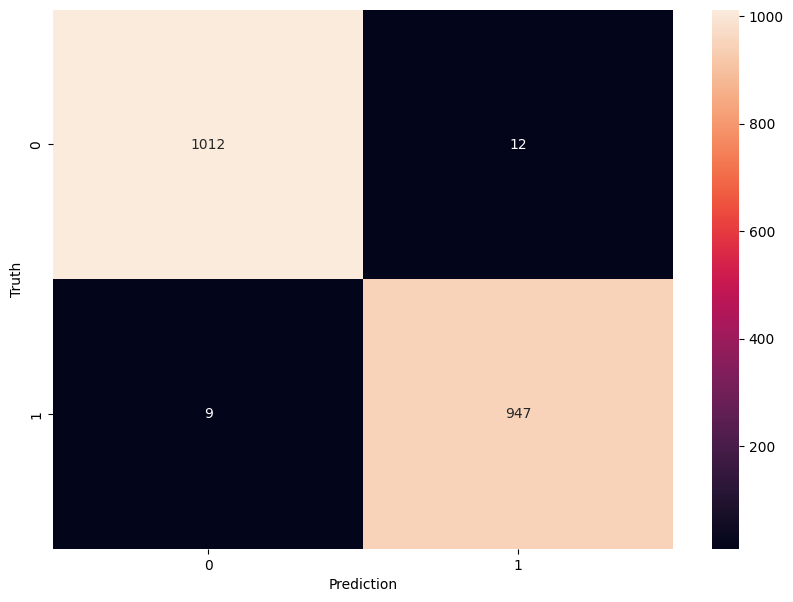

In [ ]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
df

# TF-IDF

In [ ]:
#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df = pd.read_csv('sample_data/Emotion_classify_Data[1].csv')

#print the shape of dataframe
df.shape,df.head(5)

((5937, 2),
                                              Comment Emotion
 0  i seriously hate one subject to death but now ...    fear
 1                 im so full of life i feel appalled   anger
 2  i sit here to write i start to dig out my feel...    fear
 3  ive been really angry with r and i feel like a...     joy
 4  i feel suspicious if there is no one outside l...    fear)

In [ ]:
  df['Emotion_num'] = df.Emotion.map({'joy': 0, 'fear':1, 'anger':2})
  df

,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,0
4,i feel suspicious if there is no one outside l...,fear,1
...,...,...,...
5932,i begun to feel distressed for you,fear,1
5933,i left feeling annoyed and angry thinking that...,anger,2
5934,i were to ever get married i d have everything...,joy,0
5935,i feel reluctant in applying there because i w...,fear,1


In [ ]:
#Do the 'train-test' splitting with test size of 20%
#Note: Give Random state 2022 and also do the stratify sampling
x_train,x_test, y_train,y_test = train_test_split(df.Comment,df.Emotion_num,test_size=0.2,random_state=2022,stratify=df.Emotion_num)

In [ ]:
x_train.shape,y_train.shape

((4749,), (4749,))

In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('classifier',RandomForestClassifier())
])


#2. fit with X_train and y_train
clf.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.26      0.36       400
           1       0.37      0.80      0.51       388
           2       0.53      0.23      0.32       400

    accuracy                           0.43      1188
   macro avg       0.50      0.43      0.40      1188
weighted avg       0.50      0.43      0.40      1188



In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('classifier',MultinomialNB())
])


#2. fit with X_train and y_train
clf.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       400
           1       0.85      0.82      0.83       388
           2       0.81      0.85      0.83       400

    accuracy                           0.83      1188
   macro avg       0.83      0.83      0.83      1188
weighted avg       0.83      0.83      0.83      1188



In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('classifier',RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)

#4. print the classfication report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.90       451
           1       0.87      0.94      0.90       358
           2       0.89      0.93      0.91       379

    accuracy                           0.90      1188
   macro avg       0.90      0.91      0.90      1188
weighted avg       0.91      0.90      0.90      1188



In [ ]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")


#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
# this will take some time, please be patient

df['preprocessed_comment'] = df['Comment'].apply(preprocess)

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Use the preprocessed_Comment
x_train,x_test,y_train,y_test = train_test_split(df['preprocessed_comment'],df['Emotion_num'],test_size=0.2,random_state=2022,stratify=df['Emotion_num'])

In [ ]:
  #import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('classifier',RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)

#4. print the classfication report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       415
           1       0.93      0.93      0.93       386
           2       0.91      0.94      0.93       387

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



# Word vector

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
nlp2 = spacy.load('en_core_web_lg')

In [ ]:
#read the dataset "news_dataset.json" provided and load it into dataframe "df"
df = pd.read_json('sample_data/news_dataset[1].json')
df.shape,df.head(5)

((7500, 2),
                                                 text  category
 0  Larry Nassar Blames His Victims, Says He 'Was ...     CRIME
 1       Woman Beats Cancer, Dies Falling From Horse      CRIME
 2  Vegas Taxpayers Could Spend A Record $750 Mill...    SPORTS
 3  This Richard Sherman Interception Literally Sh...    SPORTS
 4  7 Things That Could Totally Kill Weed Legaliza...  BUSINESS)

In [ ]:
df.category.value_counts()

CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: category, dtype: int64

In [ ]:
  df['label_num'] = df['category'].map({'CRIME':0,'SPORTS':1,'BUSINESS':2})
  df.head(5)

,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


In [ ]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [ ]:
df['preprocessed_text'] = df.text.apply(preprocess)

In [ ]:
df.head(5)

,text,category,label_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall Horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend Record $ 750 million New...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


In [ ]:
df['vector'] = df.preprocessed_text.apply(lambda x:nlp(x).vector)

In [ ]:
df.head()

,text,category,label_num,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...,"[-0.25104907, -0.89124787, 0.1645416, 0.047723..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall Horse,"[-0.3802158, -0.6863478, -0.166363, 0.14657779..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend Record $ 750 million New...,"[-0.5104069, -0.7860164, 0.0011511978, 0.46165..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-0.34514976, -0.70986736, -0.23807144, 0.3981..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz,"[-0.20529912, -0.38863236, -0.14613569, 0.4498..."


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.vector,df.label_num,test_size=0.2,random_state=2022)

In [ ]:
x_train2d = np.stack(x_train)

In [ ]:
x_test2d = np.stack(x_test)

In [ ]:
x_train.shape,x_train2d.shape

((6000,), (6000, 96))

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train2d,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred =  clf.predict(x_test2d)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.43      0.39      0.41       529
           1       0.44      0.43      0.44       496
           2       0.45      0.50      0.47       475

    accuracy                           0.44      1500
   macro avg       0.44      0.44      0.44      1500
weighted avg       0.44      0.44      0.44      1500



In [ ]:
scaler = MinMaxScaler()


# chat word treatment

In [3]:
chat_short_cuts = {"AFAIK":"As Far As I Know",
"AFK":"Away From Keyboard",
"ASAP":"As Soon As Possible",
"ATK":"At The Keyboard",
"ATM":"At The Moment",
"A3":"Anytime, Anywhere, Anyplace",
"BAK":"Back At Keyboard",
"BBL":"Be Back Later",
"BBS":"Be Back Soon",
"BFN":"Bye For Now",
"B4N":"Bye For Now",
"BRB":"Be Right Back",
"BRT":"Be Right There",
"BTW":"By The Way",
"B4":"Before",
"B4N":"Bye For Now",
"CU":"See You",
"CUL8R":"See You Later",
"CYA":"See You",
"FAQ":"Frequently Asked Questions",
"FC":"Fingers Crossed",
"FWIW":"For What It's Worth",
"FYI":"For Your Information",
"GAL":"Get A Life",
"GG":"Good Game",
"GN":"Good Night",
"GMTA":"Great Minds Think Alike",
"GR8":"Great!",
"G9":"Genius",
"IC":"I See",
"ICQ":"I Seek you (also a chat program)",
"ILU":"ILU: I Love You",
"IMHO":"In My Honest/Humble Opinion",
"IMO":"In My Opinion",
"IOW":"In Other Words",
"IRL":"In Real Life",
"KISS":"Keep It Simple, Stupid",
"LDR":"Long Distance Relationship",
"LMAO":"Laugh My A.. Off",
"LOL":"Laughing Out Loud",
"LTNS":"Long Time No See",
"L8R":"Later",
"MTE":"My Thoughts Exactly",
"M8":"Mate",
"NRN":"No Reply Necessary",
"OIC":"Oh I See",
"PITA":"Pain In The A..",
"PRT":"Party",
"PRW":"Parents Are Watching",
"QPSA?":"Que Pasa?",
"ROFL":"Rolling On The Floor Laughing",
"ROFLOL":"Rolling On The Floor Laughing Out Loud",
"ROTFLMAO":"Rolling On The Floor Laughing My A.. Off",
"SK8":"Skate",
"STATS":"Your sex and age",
"ASL":"Age, Sex, Location",
"THX":"Thank You",
"TTFN":"Ta-Ta For Now!",
"TTYL":"Talk To You Later",
"U":"You",
"U2":"You Too",
"U4E":"Yours For Ever",
"WB":"Welcome Back",
"WTF":"What The F...",
"WTG":"Way To Go!",
"WUF":"Where Are You From?",
"W8":"Wait...",
"7K":"Sick:-D Laugher",
"TFW":"That feeling when. TFW internet slang often goes in a caption to an image.",
"MFW":"My face when",
"MRW":"My reaction when",
"IFYP":"I feel your pain",
"LOL":"Laughing out loud",
"TNTL":"Trying not to laugh",
"JK":"Just kidding",
"IDC":"I don’t care",
"ILY":"I love you",
"IMU":"I miss you",
"ADIH":"Another day in hell",
"IDC":"I don’t care",
"ZZZ":"Sleeping, bored, tired",
"WYWH":"Wish you were here",
"TIME":"Tears in my eyes",
"BAE":"Before anyone else",
"FIMH":"Forever in my heart",
"BSAAW":"Big smile and a wink",
"BWL":"Bursting with laughter",
"LMAO":"Laughing my a** off",
"BFF":"Best friends forever",
"CSL":"Can’t stop laughing"}

In [26]:
text = "LOL you are so funny"
for i in text.split():
  word = i.strip()
  if word.upper() in chat_short_cuts:
    text = text.replace(word.upper(),chat_short_cuts[word.upper()])
text

'Laughing out loud you are so funny'

# spelling correction

In [39]:
from textblob import TextBlob

In [40]:
textToCorrect = "ceertain conditions are prevailing in the southern part of the world"
textblobObj = TextBlob(textToCorrect)
textblobObj.correct().string

'certain conditions are prevailing in the southern part of the world'

# Removing emojis

In [32]:
text_with_emoji = "😀hi"

In [31]:
import emoji
text_with_emoji2 = emoji.demojize(text_with_emoji)
text_with_emoji2

':grinning_face:hi'

In [48]:
import re
import unicodedata

def emoji_to_unicode(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)


In [49]:
# Test the function
text = "Hello World! 👋🌍"
print(emoji_to_unicode(text))

Hello World! 


# Stemmer

In [51]:
from nltk.stem.porter import PorterStemmer

In [53]:
sample = "walk walks walking eat eating ate"
ps = PorterStemmer()
processedText =" ".join([ps.stem(w) for w in sample.split()])
processedText

'walk walk walk eat eat ate'

# Lemmetizer

In [59]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [60]:
processedText =" ".join([lemmatizer.lemmatize(w) for w in sample.split()])
processedText

'walk walk walking eat eating ate'

In [62]:
processedText =" ".join([lemmatizer.lemmatize(w,'v') for w in sample.split()]) #v -> verb
processedText

'walk walk walk eat eat eat'